<a href="https://colab.research.google.com/github/onleey/data_demo/blob/master/501_%EB%8D%B0%EC%9D%B4%ED%84%B0%EC%8B%9C%EA%B0%81%ED%99%94_%EA%B7%B8%EB%9E%98%ED%94%84%EA%B7%B8%EB%A6%AC%EA%B8%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 구글 코랩에서 한글 문제 해결 및 ~~~



In [1]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 15 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

In [2]:
from google.colab import drive
drive.mount('/content/drive')

%cd  '/content/drive/MyDrive/001'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/001


In [4]:
import matplotlib.font_manager

sorted([ f.name for f in  matplotlib.font_manager.fontManager.ttflist if f.name.startswith('Nanum')])

['NanumBarunGothic',
 'NanumBarunGothic',
 'NanumGothic',
 'NanumGothic',
 'NanumGothicCoding',
 'NanumGothicCoding',
 'NanumMyeongjo',
 'NanumMyeongjo',
 'NanumSquare',
 'NanumSquare',
 'NanumSquareRound',
 'NanumSquareRound']

In [5]:
import numpy as np
import pandas as pd
import matplotlib as mp
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
plt.rc('font', family='NanumBarunGothic')

In [7]:
plt.rc('font', family='NanumBarunGothic')

In [8]:
plt.rcParams['axes.unicode_minus'] =False

matplotlib으로 그래프 그리기

In [9]:
tips = sns.load_dataset('tips')
print(tips)

     total_bill   tip     sex smoker   day    time  size
0         16.99  1.01  Female     No   Sun  Dinner     2
1         10.34  1.66    Male     No   Sun  Dinner     3
2         21.01  3.50    Male     No   Sun  Dinner     3
3         23.68  3.31    Male     No   Sun  Dinner     2
4         24.59  3.61  Female     No   Sun  Dinner     4
..          ...   ...     ...    ...   ...     ...   ...
239       29.03  5.92    Male     No   Sat  Dinner     3
240       27.18  2.00  Female    Yes   Sat  Dinner     2
241       22.67  2.00    Male    Yes   Sat  Dinner     2
242       17.82  1.75    Male     No   Sat  Dinner     2
243       18.78  3.00  Female     No  Thur  Dinner     2

[244 rows x 7 columns]


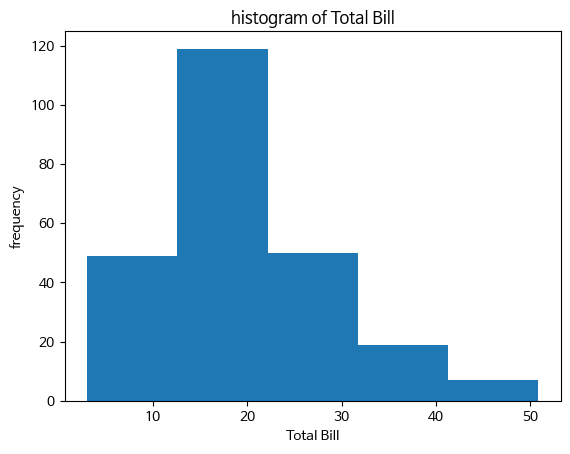

In [10]:
fig = plt.figure()
axes1 = fig.add_subplot(1,1,1)
axes1.hist(data = tips, x='total_bill', bins=5)

axes1.set_title('histogram of Total Bill')
axes1.set_xlabel('Total Bill')
axes1.set_ylabel('frequency')



plt.show()

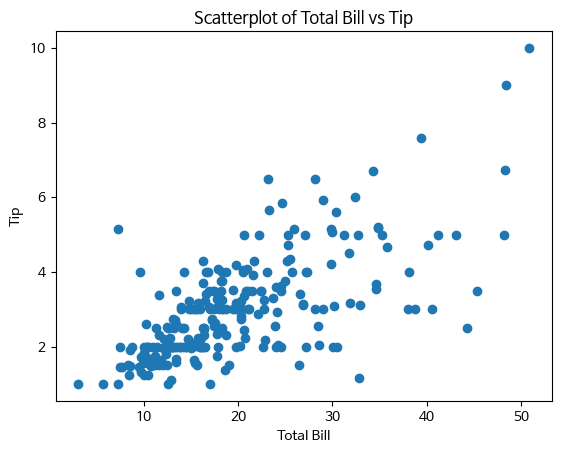

In [11]:
# 산점도 그래프 그리기

fig = plt.figure()
axes1 = fig.add_subplot(1,1,1)
axes1.scatter(tips['total_bill'],tips['tip'])

axes1.set_title('Scatterplot of Total Bill vs Tip')
axes1.set_xlabel('Total Bill')
axes1.set_ylabel('Tip')

plt.show()

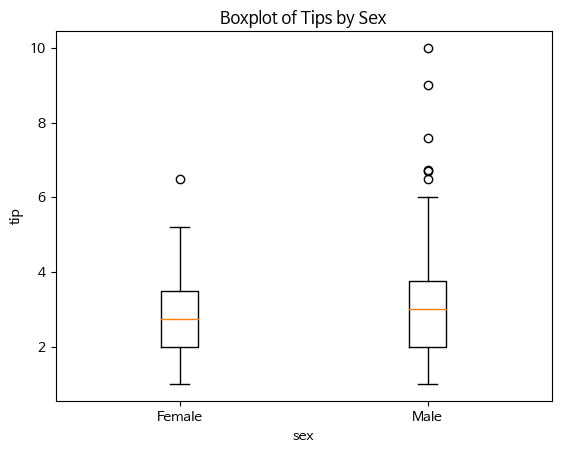

In [15]:
# 박스 그래프 그리기
fig = plt.figure()
axes1 = fig.add_subplot(1,1,1)

axes1.boxplot(x=[tips[tips['sex']=='Female']['tip'],tips[tips['sex']=='Male']['tip']],labels=['Female','Male'])
axes1. set_xlabel('sex')
axes1.set_ylabel('tip')
axes1.set_title('Boxplot of Tips by Sex')

plt.show()

ValueError: ignored

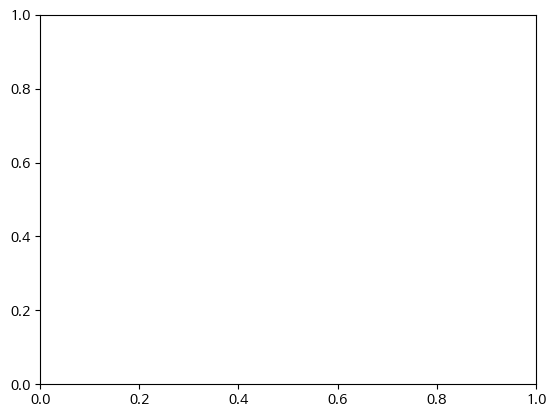

In [18]:
colors = {'female': '#f1a340', 'Male':'#998ec3'}

fig = plt.figure()
axes1 = fig.add_subplot (1,1,1)

axes1.scatter(data = tips, x='total_bill', y='tip', s=tips['size']**2*10, c=tips['sex'].map(colors),alpha=0.5)

axes1.set_title('Colored by sex and sized by size')
axes1.set_xlabel('Total Bill')
axes1.set_ylabel('Tip')

plt.show()

### Seaborn으로 그래프 그리기

In [19]:
tips = sns.load_dataset('tips')

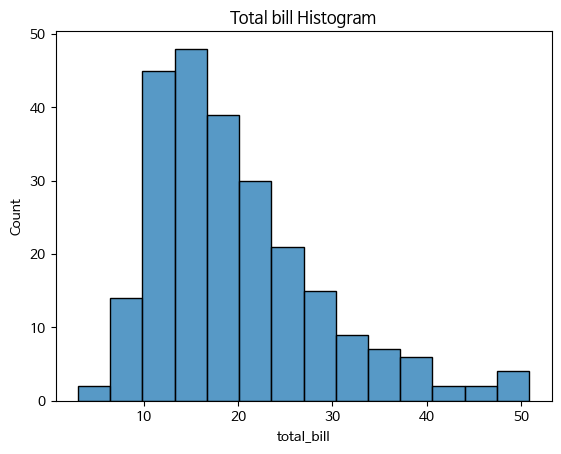

In [22]:
#히스토그램 그리기

fig ,ax = plt.subplots()
sns.histplot(data=tips, x='total_bill', ax=ax)
ax.set_title('Total bill Histogram')

plt.show()

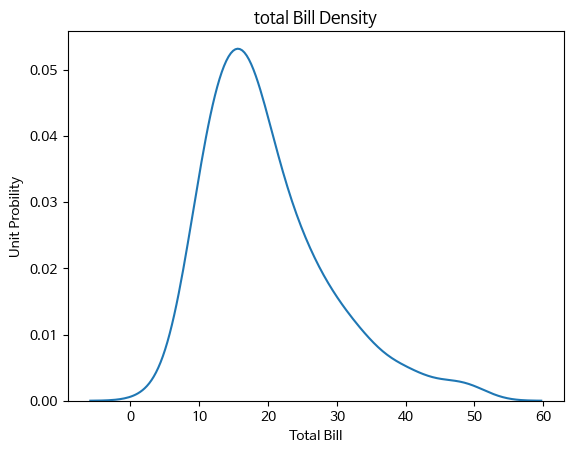

In [23]:
# 밀도 분포 그리기
fig, ax = plt.subplots()

sns.kdeplot(data = tips, x= 'total_bill', ax =ax)

ax.set_title('total Bill Density')
ax.set_xlabel('Total Bill')
ax.set_ylabel('Unit Probility')

plt.show()

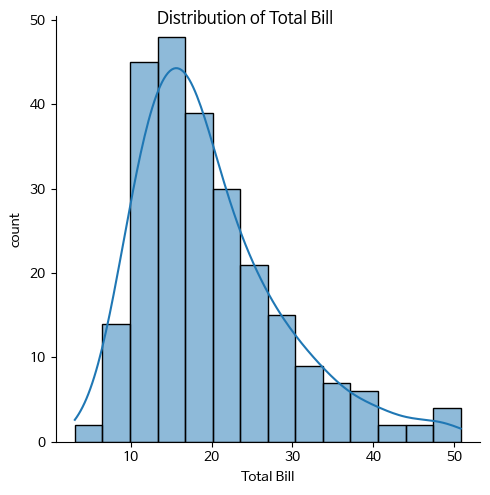

In [26]:
fig = sns.displot(data = tips, x='total_bill', kde = True)

fig.set_axis_labels(x_var= 'Total Bill', y_var='count')
fig.figure.suptitle('Distribution of Total Bill')

plt.show()

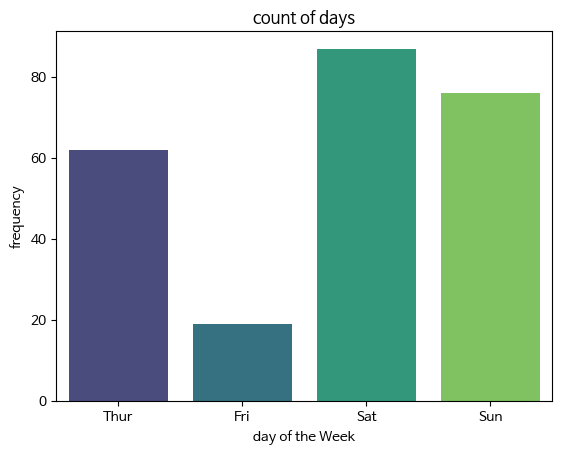

In [27]:
# 막대그래프
count, ax = plt.subplots()

sns.countplot(data=tips, x='day', palette='viridis', ax=ax)

ax.set_title('count of days')
ax.set_xlabel('day of the Week')
ax.set_ylabel('frequency')

plt.show()

이변량 그래프 그리기

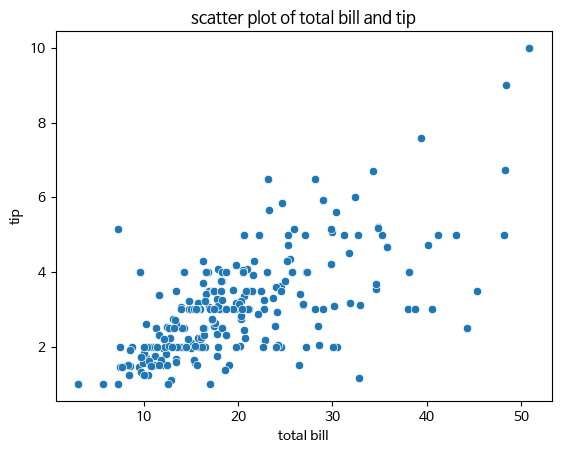

In [30]:
#t산점도 그래프 그리기
fig, ax = plt.subplots()

sns.scatterplot(data = tips, x= 'total_bill', y= 'tip', ax=ax)

ax.set_title('scatter plot of total bill and tip')
ax.set_xlabel('total bill')
ax.set_ylabel('tip')

plt.show()

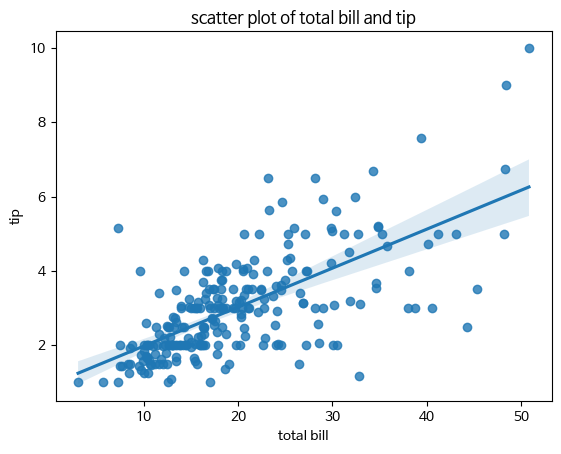

In [32]:
fig, ax = plt.subplots()

sns.regplot(data = tips, x= 'total_bill', y= 'tip', ax=ax, fit_reg=True)

ax.set_title('scatter plot of total bill and tip')
ax.set_xlabel('total bill')
ax.set_ylabel('tip')

plt.show()

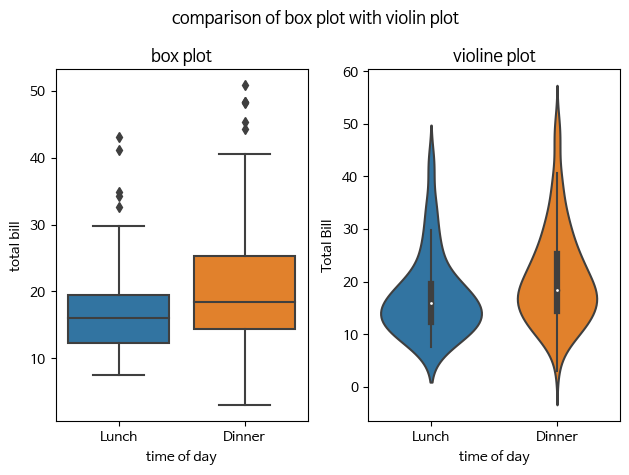

In [33]:
#boxplot 과 vilineplot비교
box_violin,(ax1, ax2)=plt.subplots(nrows=1, ncols=2)

sns.boxplot(data=tips, x='time', y='total_bill', ax=ax1)
sns.violinplot(data=tips, x='time', y='total_bill', ax=ax2)

ax1.set_title('box plot')
ax1.set_xlabel('time of day')
ax1.set_ylabel('total bill')

ax2.set_title('violine plot')
ax2.set_xlabel('time of day')
ax2.set_ylabel('Total Bill')

box_violin.suptitle('comparison of box plot with violin plot')

box_violin.set_tight_layout(True)

plt.show()

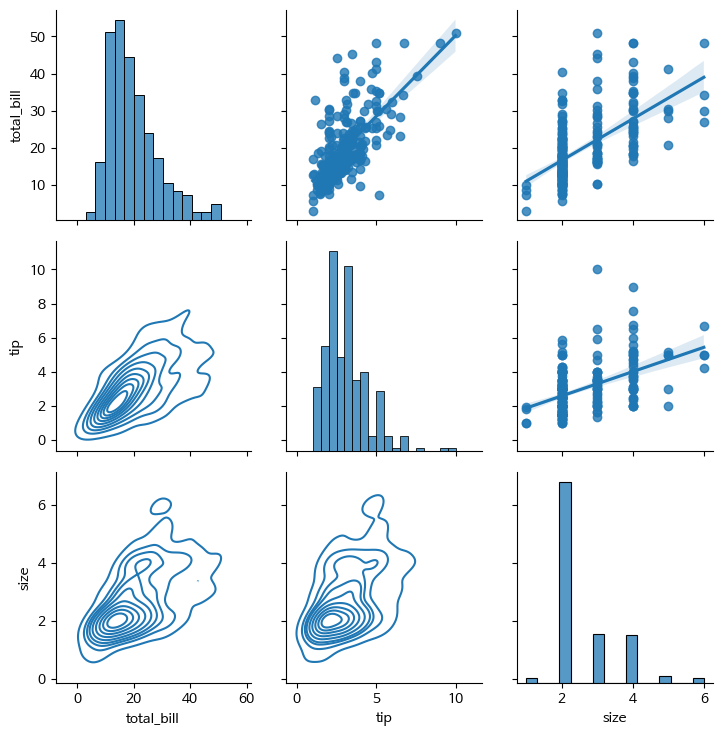

In [40]:
#관계그래프 그리기
pair_grid = sns.PairGrid(tips, diag_sharey=False)

pair_grid = pair_grid.map_upper(sns.regplot)
pair_grid = pair_grid.map_lower(sns.kdeplot)
pair_grid = pair_grid.map_diag(sns.histplot)


plt.show()